In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

/Users/qichaohuang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data=pd.read_excel("CMT-all.xlsx")
data.set_index('Date',inplace=True)

In [3]:
cov_r=data.cov()
cov_dr=data.diff().cov()
print cov_r
print '************************************************************'
print cov_dr

           1M        3M        6M        1Y        2Y        3Y        5Y  \
1M   2.532393  2.567935  2.605529  2.526506  2.327828  2.147393  1.813928   
3M   2.567935  5.608616  5.679470  5.640800  5.573952  5.333336  4.805528   
6M   2.605529  5.679470  5.768625  5.741682  5.683824  5.442334  4.906743   
1Y   2.526506  5.640800  5.741682  5.739682  5.712999  5.487649  4.969150   
2Y   2.327828  5.573952  5.683824  5.712999  5.757059  5.570850  5.102656   
3Y   2.147393  5.333336  5.442334  5.487649  5.570850  5.420633  5.008704   
5Y   1.813928  4.805528  4.906743  4.969150  5.102656  5.008704  4.702619   
7Y   1.542817  4.413174  4.505454  4.572601  4.725882  4.661391  4.416172   
10Y  1.311608  3.961007  4.045461  4.116058  4.279169  4.241013  4.057186   
20Y  1.080558  2.846039  2.931602  3.011662  3.097393  3.045834  2.859617   
30Y  1.011735  3.717888  3.797137  3.878911  4.075819  4.070875  3.955971   

           7Y       10Y       20Y       30Y  
1M   1.542817  1.311608  1.08

### First, we implement the pca dropping the NA.

[  92.65143401   99.10149498   99.78836488   99.91559281   99.95325793
   99.97863999   99.98854826   99.9902291    99.99257856   99.99583165
  100.        ]


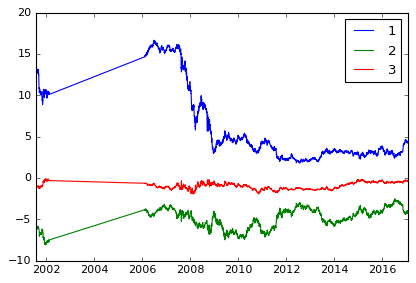

In [6]:
xcv,vcv=np.linalg.eig(data.dropna().cov())
fs=data.dropna().dot(-vcv[:,:3]) 
pct_v = np.cumsum(xcv)/sum(xcv)*100
print pct_v
plt.plot(fs)
plt.legend([1,2,3]);


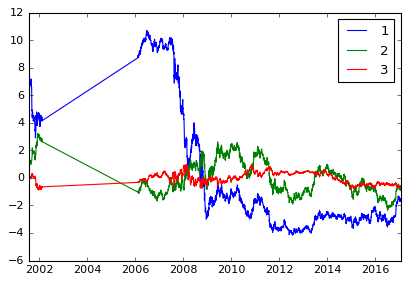

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
reduction=pca.fit_transform(data.dropna())
reduction=pd.DataFrame(reduction,index=data.dropna().index)
plt.plot(reduction)
plt.legend([1,2,3]);

Using two methods to get the first three factor, the result is similar, except that the first one did not standardize the data. But we could see that almost half of the data are wasted.

* We could also use interpolatation for the NA values. We just implement the linear interpolatation.

In [8]:
df=data.interpolate(axis=1,limit_direction='both')
df.describe()

/Users/qichaohuang/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,1M,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
count,3874.00000,6773.000000,6773.000000,6773.000000,6773.000000,6773.000000,6773.000000,6773.000000,6773.000000,6773.000000,6773.000000
mean,1.23477,2.894654,3.031674,3.164738,3.492535,3.727570,4.153535,4.479215,4.731822,5.237551,5.286260
std,1.59135,2.368456,2.401796,2.395763,2.399387,2.328225,2.168552,2.042845,1.896191,1.748022,1.654881
min,0.00000,0.000000,0.020000,0.080000,0.160000,0.280000,0.560000,0.910000,1.370000,1.690000,2.110000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.27000,8.260000,8.490000,8.640000,9.050000,9.110000,9.100000,9.120000,9.090000,9.110000,9.180000


In [20]:
df['1M'][df['1M'].isnull()]=-2./3*df['6M'][df['1M'].isnull()]+5./3*df['3M'][df['1M'].isnull()] #linear interpolatation fot 1M
df.dropna(inplace=True)
df.describe()
df[df['6M'].isnull()]

,1M,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
Date,,,,,,,,,,,


,0,1,2
0,1.000000e+00,-2.326678e-16,-7.750556e-17
1,-2.326678e-16,1.000000e+00,4.717246e-16
2,-7.750556e-17,4.717246e-16,1.000000e+00


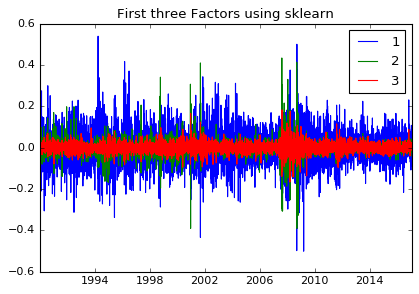

In [34]:
df_=(df-np.mean(df))/np.std(df)
#print df_[df_['30Y'].isnull()]
df_dr=df_.diff()[1:]
pca=PCA(n_components=3)
reduction_df=pca.fit_transform(df_dr)
reduction_df=pd.DataFrame(reduction_df,index=df_dr.index)
plt.plot(reduction_df)
plt.legend([1,2,3])
plt.title("First three Factors using sklearn")
reduction_df.corr()

,0,1,2
0,1.000000e+00,3.810448e-16,4.137297e-16
1,3.810448e-16,1.000000e+00,1.129629e-16
2,4.137297e-16,1.129629e-16,1.000000e+00


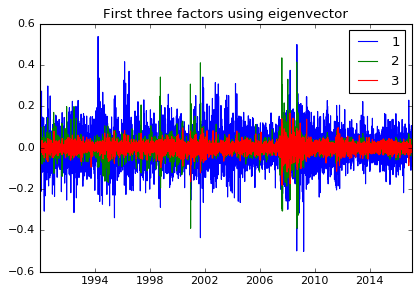

In [35]:
cov_dr_df=df_dr.cov()
xcv_df,vcv_df=np.linalg.eig(cov_dr_df)
remp=np.tile([-1,1,1],[df_dr.shape[0],1])
fs_df=df_dr.dot(vcv_df).iloc[:,:3]*remp 
pct_v = np.cumsum(xcv_df)/sum(xcv_df)*100
plt.plot(fs_df)
plt.legend([1,2,3]);
plt.title("First three factors using eigenvector");
fs_df.corr()

We standardize the data. And we change the sign of the eigenvector in order to get the same result from the PCA. We see that the factor is independent and the plot is almost same for two methods. Later we should use more accurate models for short rate.